In [78]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%connect_info

{
  "shell_port": 9012,
  "iopub_port": 9014,
  "stdin_port": 9013,
  "control_port": 9011,
  "hb_port": 9010,
  "ip": "127.0.0.1",
  "key": "dc1d62c2-b71e-4ede-a568-00f4bc3d351a",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing /var/folders/2p/03gtrn8s52v1ggbdgxdl5t2w0000gs/T/tmp-2357851fsl6OQ4owj.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [51]:
dat = pd.read_csv("ldt_data.csv")
dat.describe()

,age,language,rt_word,rt_nonword,acc_word,acc_nonword
count,100.000000,100.00,100.000000,100.000000,100.000000,100.000000
mean,29.750000,1.45,353.623455,515.782592,95.010000,84.900000
std,8.284554,0.50,44.043273,90.602102,2.134351,3.608352
min,18.000000,1.00,256.283346,327.297469,89.000000,76.000000
25%,24.000000,1.00,322.612659,438.760877,94.000000,82.750000
50%,28.500000,1.00,353.778321,510.553094,95.000000,85.000000
75%,33.250000,2.00,379.514705,582.865114,96.250000,88.000000
max,58.000000,2.00,479.601294,706.231742,100.000000,93.000000


In [52]:
dat = dat.replace({'language': {1: "Monolongual", 2: "Bilingual"}})
dat['language'] = dat['language'].astype('category')

In [53]:
age_stats = dat['age'].aggregate(['mean', 'std', 'count'])
age_stats

mean      29.750000
std        8.284554
count    100.000000
Name: age, dtype: float64

In [54]:
age_stats = dat.groupby('language')['age'].aggregate(['mean', 'std', 'count'])
age_stats

,mean,std,count
language,,,
Bilingual,31.933333,9.439761,45
Monolongual,27.963636,6.782231,55


In [55]:
sns.set_style("darkgrid")

<AxesSubplot:xlabel='language', ylabel='count'>

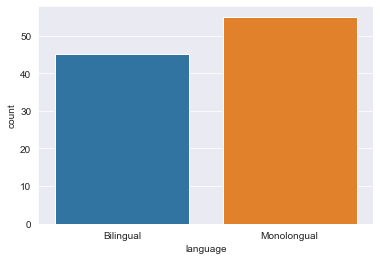

In [56]:
sns.barplot(data=age_stats.reset_index(), x='language', y='count')

<AxesSubplot:xlabel='language', ylabel='percent'>

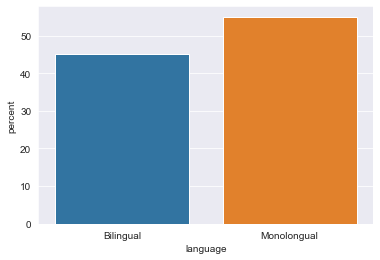

In [57]:
dat_percent = dat.groupby('language')[['age']].count().rename(columns={'age':'count'})
dat_percent['percent'] = 100 * dat_percent['count'] / dat_percent['count'].sum()
sns.barplot(data=dat_percent.reset_index(), x='language', y='percent')

<AxesSubplot:xlabel='age', ylabel='Count'>

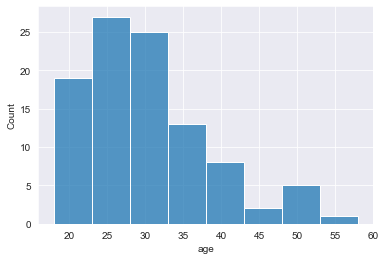

In [38]:
sns.histplot(data=dat,x='age',binwidth=5)

<AxesSubplot:xlabel='age', ylabel='Count'>

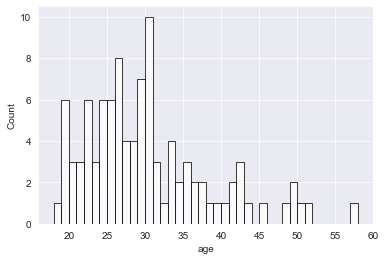

In [58]:
sns.histplot(data=dat,x='age',binwidth=1,color='white',edgecolor='black')

Text(0, 0.5, 'Numper of participants')

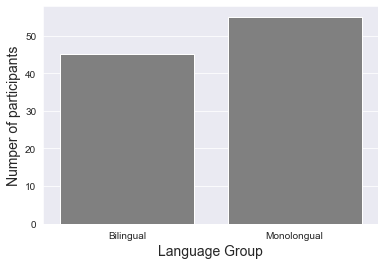

In [60]:
p = sns.barplot(data=age_stats.reset_index(), x='language', y='count', color='gray')
p.set_xlabel('Language Group', fontsize=14)
p.set_ylabel('Numper of participants', fontsize=14)

In [155]:
dat_long = (pd.wide_to_long(dat, stubnames=['rt','acc'], i='id', j='condition', sep='_', suffix=r'\w+')
            .reset_index()
            .rename(columns=str.capitalize)
            .rename(columns={'Rt':'RT'})
            .replace({'Condition': {'word': 'Word', 'nonword': 'Non-word'}})
)

(-0.5, 14.7)

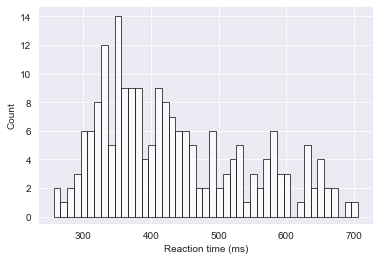

In [158]:
p = sns.histplot(data=dat_long,x='RT',binwidth=10,color='white',edgecolor='black')
p.set_xlabel('Reaction time (ms)')
p.set_ylim([-0.5,p.get_ylim()[1]])

(-0.5, 19.95)

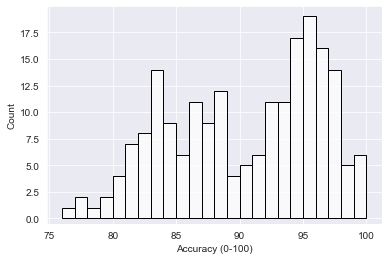

In [159]:
p = sns.histplot(data=dat_long,x='Acc',binwidth=1,color='white',edgecolor='black')
p.set_xlabel('Accuracy (0-100)')
p.set_ylim([-0.5,p.get_ylim()[1]])

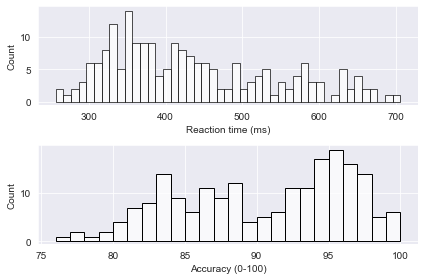

In [161]:
fig, ax = plt.subplots(nrows=2,ncols=1)
p = sns.histplot(data=dat_long,x='RT',binwidth=10,color='white',edgecolor='black',ax=ax[0])
p.set_xlabel('Reaction time (ms)')
p.set_ylim([-0.5,p.get_ylim()[1]])
p = sns.histplot(data=dat_long,x='Acc',binwidth=1,color='white',edgecolor='black',ax=ax[1])
p.set_xlabel('Accuracy (0-100)')
p.set_ylim([-0.5,p.get_ylim()[1]])
plt.tight_layout()

Text(0.5, 0, 'Reaction time (ms)')

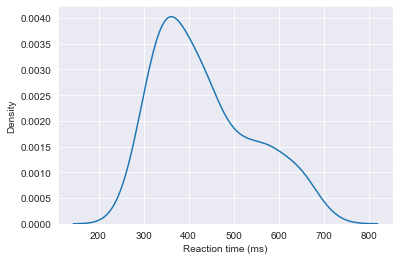

In [162]:
p = sns.kdeplot(data=dat_long,x='RT')
p.set_xlabel('Reaction time (ms)')

Text(0.5, 0, 'Reaction time (ms)')

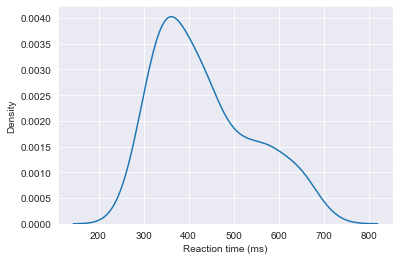

In [163]:
p = sns.kdeplot(data=dat_long,x='RT')
p.set_xlabel('Reaction time (ms)')

Text(0.5, 0, 'Reaction time (ms)')

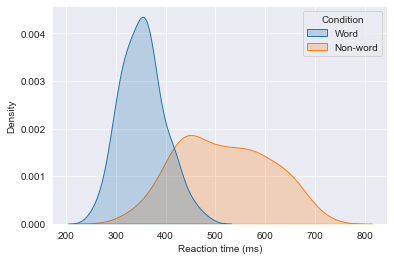

In [164]:
p = sns.kdeplot(data=dat_long,x='RT',hue='Condition', fill=True)
p.set_xlabel('Reaction time (ms)')

Text(0.5, 0, 'Reaction time (ms)')

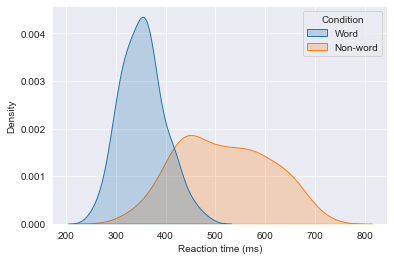

In [169]:
p = sns.kdeplot(data=dat_long, x='RT',
                hue='Condition', fill=True)
p.set_xlabel('Reaction time (ms)')

<AxesSubplot:xlabel='RT', ylabel='Age'>

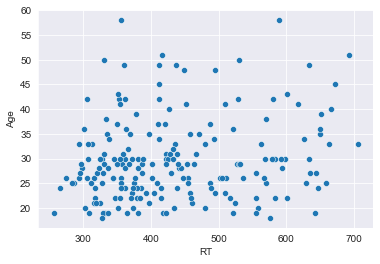

In [170]:
sns.scatterplot(data=dat_long, x='RT', y='Age')

<AxesSubplot:xlabel='RT', ylabel='Age'>

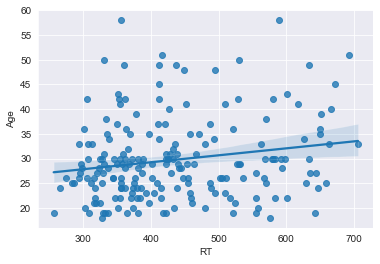

In [171]:
sns.regplot(data=dat_long, x='RT', y='Age')

Text(0.5, 0, 'Reaction time (ms)')

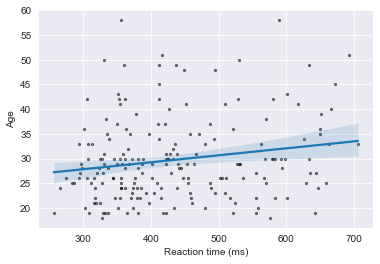

In [173]:
sns.regplot(data=dat_long, x='RT', y='Age', 
            scatter_kws={'color': 'black', 'alpha': 0.5, 's': 5}) \
                .set_xlabel('Reaction time (ms)')

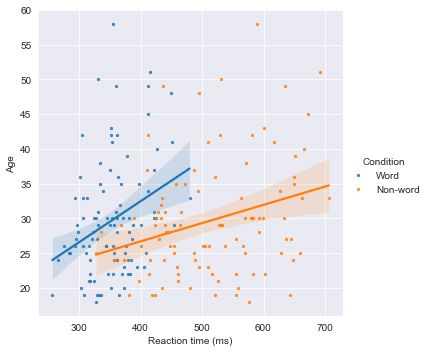

In [175]:
g = (sns.lmplot(data=dat_long, x='RT', y='Age', hue='Condition', 
                scatter_kws={'s': 5})
        .set(xlabel='Reaction time (ms)')
)

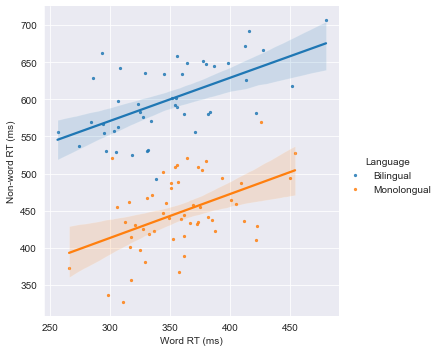

In [183]:
g = (sns.lmplot(data=dat.rename(columns={'language':'Language'}),
                x='rt_word', y='rt_nonword', hue='Language', 
                scatter_kws={'s': 5})
     .set(xlabel='Word RT (ms)', ylabel='Non-word RT (ms)')
)

In [229]:
dat_wide = (dat_long.rename(columns=str.lower)
            .replace({'condition': {'Word': 'word', 'Non-word': 'nonword'}})
            .pivot_table(index='id', columns='condition', values=['rt','acc'])
)
dat_wide.columns = ['_'.join(i) for i in dat_wide.columns]

Text(0, 0.5, 'Accuracy')

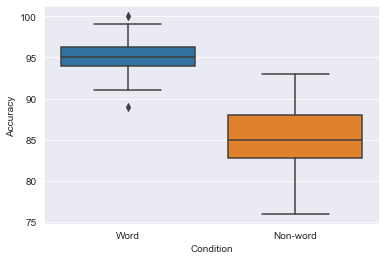

In [234]:
sns.boxplot(data=dat_long, x='Condition', y='Acc').set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

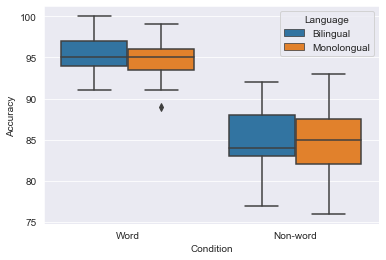

In [235]:
sns.boxplot(data=dat_long, x='Condition', y='Acc', hue='Language').set_ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

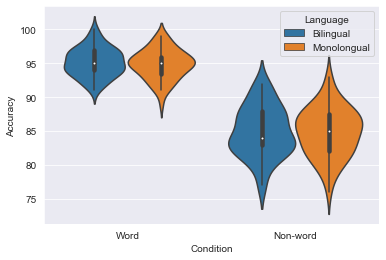

In [236]:
sns.violinplot(data=dat_long, x='Condition', y='Acc', hue='Language').set_ylabel('Accuracy')